In [1]:
# Real-time Monitoring Dashboard for Fake News Detection System
# Day 3 - Member 0148

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import time
from datetime import datetime, timedelta
import json
import requests
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

Generating sample real-time monitoring data...

=== System Overview ===
Total Predictions: 200
Time Range: 2025-08-17 19:19:43.502823 to 2025-08-18 01:57:43.502823
Fake News Rate: 34.0%
Average Confidence: 0.820
Average Processing Time: 0.230s

=== Alert Status ===
Critical Alerts: 1
Warning Alerts: 0
Total Active Alerts: 1

=== Real-Time Dashboard ===


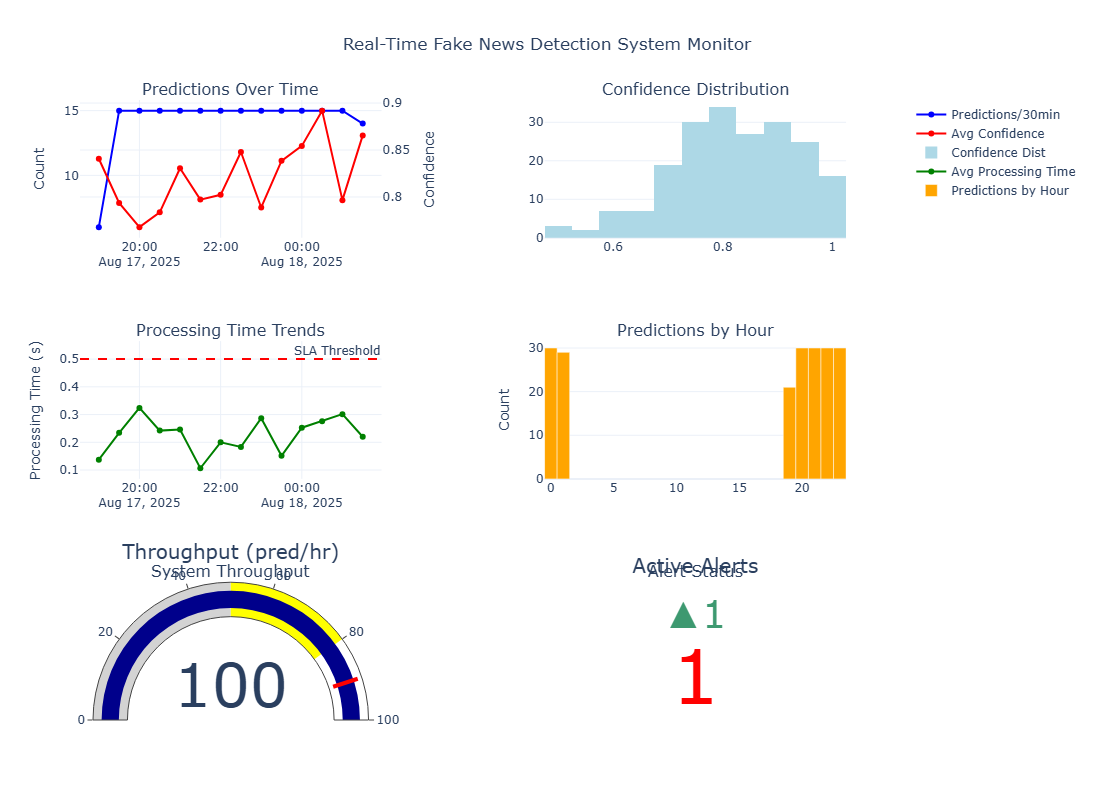


=== Performance Report ===
{
  "timestamp": "2025-08-17T21:19:45.650411",
  "total_predictions": 200,
  "time_period": "2025-08-17 19:19:43.502823 to 2025-08-18 01:57:43.502823",
  "prediction_distribution": {
    "real": 132,
    "fake": 68
  },
  "avg_confidence": 0.8203273873966543,
  "avg_processing_time": 0.22984893094915965,
  "max_processing_time": 1.1543872625776757,
  "sla_compliance": 88.5,
  "confidence_quartiles": {
    "0.25": 0.751111101546991,
    "0.5": 0.8198889281384165,
    "0.75": 0.9014096344335006
  },
  "hourly_distribution": {
    "0": 30,
    "1": 29,
    "19": 21,
    "20": 30,
    "21": 30,
    "22": 30,
    "23": 30
  }
}
Monitoring data exported to monitoring_data_20250817_211945.csv

Data exported to: monitoring_data_20250817_211945.csv


In [2]:
class RealTimeMonitor:
    def __init__(self, api_base_url="http://localhost:5000/api"):
        self.api_base_url = api_base_url
        self.prediction_history = []
        self.performance_metrics = {}
        self.system_metrics = {}
        
    def fetch_system_stats(self):
        """Fetch current system statistics"""
        try:
            response = requests.get(f"{self.api_base_url}/stats")
            if response.status_code == 200:
                return response.json()
            else:
                return None
        except:
            return None
    
    def simulate_real_time_data(self, n_points=50):
        """Simulate real-time prediction data"""
        timestamps = []
        predictions = []
        confidences = []
        processing_times = []
        
        base_time = datetime.now() - timedelta(hours=2)
        
        for i in range(n_points):
            timestamp = base_time + timedelta(minutes=i*2)
            pred = np.random.choice(['real', 'fake'], p=[0.65, 0.35])
            conf = np.random.normal(0.82, 0.12)
            conf = max(0.5, min(0.99, conf))  # Clip to reasonable range
            proc_time = np.random.exponential(0.25)
            
            timestamps.append(timestamp)
            predictions.append(pred)
            confidences.append(conf)
            processing_times.append(proc_time)
        
        return pd.DataFrame({
            'timestamp': timestamps,
            'prediction': predictions,
            'confidence': confidences,
            'processing_time': processing_times
        })
    
    def create_real_time_dashboard(self, df):
        """Create comprehensive real-time monitoring dashboard"""
        # Create subplots with CORRECTED specs
        fig = make_subplots(
            rows=3, cols=2,
            subplot_titles=[
                'Predictions Over Time', 'Confidence Distribution',
                'Processing Time Trends', 'Predictions by Hour',
                'System Throughput', 'Alert Status'
            ],
            specs=[
                [{"type": "xy", "secondary_y": True}, {"type": "histogram"}],
                [{"type": "xy"}, {"type": "bar"}],
                [{"type": "indicator"}, {"type": "indicator"}]
            ]
        )
        
        # 1. Predictions over time with confidence
        df_hourly = df.set_index('timestamp').resample('30T').agg({
            'prediction': 'count',
            'confidence': 'mean'
        }).reset_index()
        
        fig.add_trace(
            go.Scatter(
                x=df_hourly['timestamp'], 
                y=df_hourly['prediction'],
                mode='lines+markers', 
                name='Predictions/30min',
                line=dict(color='blue')
            ),
            row=1, col=1
        )
        
        fig.add_trace(
            go.Scatter(
                x=df_hourly['timestamp'], 
                y=df_hourly['confidence'],
                mode='lines+markers', 
                name='Avg Confidence',
                line=dict(color='red')
            ),
            row=1, col=1, secondary_y=True
        )
        
        # 2. Confidence distribution
        fig.add_trace(
            go.Histogram(
                x=df['confidence'], 
                nbinsx=20, 
                name='Confidence Dist',
                marker_color='lightblue'
            ),
            row=1, col=2
        )
        
        # 3. Processing time trends
        df_proc_time = df.set_index('timestamp').resample('30T')['processing_time'].mean().reset_index()
        
        fig.add_trace(
            go.Scatter(
                x=df_proc_time['timestamp'], 
                y=df_proc_time['processing_time'],
                mode='lines+markers', 
                name='Avg Processing Time',
                line=dict(color='green')
            ),
            row=2, col=1
        )
        
        # Add processing time threshold line
        fig.add_hline(
            y=0.5, 
            line_dash="dash", 
            line_color="red", 
            annotation_text="SLA Threshold", 
            row=2, col=1
        )
        
        # 4. Prediction count by hour
        df['hour'] = df['timestamp'].dt.hour
        hourly_stats = df.groupby('hour').agg({
            'prediction': 'count',
            'confidence': 'mean'
        }).reset_index()
        
        fig.add_trace(
            go.Bar(
                x=hourly_stats['hour'], 
                y=hourly_stats['prediction'],
                name='Predictions by Hour', 
                marker_color='orange'
            ),
            row=2, col=2
        )
        
        # 5. System performance metrics - INDICATOR
        current_throughput = len(df) / 2  # predictions per hour
        avg_confidence = df['confidence'].mean()
        avg_processing_time = df['processing_time'].mean()
        
        fig.add_trace(
            go.Indicator(
                mode="gauge+number",
                value=current_throughput,
                domain={'x': [0, 1], 'y': [0, 1]},
                title={'text': "Throughput (pred/hr)"},
                gauge={
                    'axis': {'range': [None, 100]},
                    'bar': {'color': "darkblue"},
                    'steps': [
                        {'range': [0, 50], 'color': "lightgray"},
                        {'range': [50, 80], 'color': "yellow"}
                    ],
                    'threshold': {
                        'line': {'color': "red", 'width': 4},
                        'thickness': 0.75, 
                        'value': 90
                    }
                }
            ),
            row=3, col=1
        )
        
        # 6. Alert status - INDICATOR
        alerts = self.check_system_alerts(df)
        alert_color = "red" if alerts['critical'] > 0 else "yellow" if alerts['warning'] > 0 else "green"
        
        fig.add_trace(
            go.Indicator(
                mode="number+delta",
                value=alerts['total'],
                title={'text': "Active Alerts"},
                number={'font': {'color': alert_color}},
                delta={'reference': 0, 'position': "top"}
            ),
            row=3, col=2
        )
        
        # Update layout
        fig.update_layout(
            height=800,
            title_text="Real-Time Fake News Detection System Monitor",
            title_x=0.5,
            showlegend=True,
            template="plotly_white"
        )
        
        # Update axes labels
        fig.update_yaxes(title_text="Count", row=1, col=1)
        fig.update_yaxes(title_text="Confidence", row=1, col=1, secondary_y=True)
        fig.update_yaxes(title_text="Processing Time (s)", row=2, col=1)
        fig.update_yaxes(title_text="Count", row=2, col=2)
        
        return fig
    
    def check_system_alerts(self, df):
        """Check for system alerts and anomalies"""
        alerts = {'critical': 0, 'warning': 0, 'info': 0, 'total': 0}
        
        # Check processing time SLA
        high_processing_time = df[df['processing_time'] > 0.5]
        if len(high_processing_time) > len(df) * 0.1:  # More than 10%
            alerts['critical'] += 1
        
        # Check confidence distribution
        low_confidence = df[df['confidence'] < 0.6]
        if len(low_confidence) > len(df) * 0.2:  # More than 20%
            alerts['warning'] += 1
        
        # Check prediction rate anomalies
        recent_hour = df[df['timestamp'] > (datetime.now() - timedelta(hours=1))]
        if len(recent_hour) == 0:
            alerts['critical'] += 1
        elif len(recent_hour) < 5:  # Less than 5 predictions in last hour
            alerts['warning'] += 1
        
        # Check for fake news spike
        fake_rate = len(df[df['prediction'] == 'fake']) / len(df) if len(df) > 0 else 0
        if fake_rate > 0.6:  # More than 60% fake
            alerts['warning'] += 1
        
        alerts['total'] = alerts['critical'] + alerts['warning'] + alerts['info']
        return alerts
    
    def generate_performance_report(self, df):
        """Generate detailed performance report"""
        report = {
            'timestamp': datetime.now().isoformat(),
            'total_predictions': len(df),
            'time_period': f"{df['timestamp'].min()} to {df['timestamp'].max()}",
            'prediction_distribution': df['prediction'].value_counts().to_dict(),
            'avg_confidence': df['confidence'].mean(),
            'avg_processing_time': df['processing_time'].mean(),
            'max_processing_time': df['processing_time'].max(),
            'sla_compliance': len(df[df['processing_time'] <= 0.5]) / len(df) * 100,
            'confidence_quartiles': df['confidence'].quantile([0.25, 0.5, 0.75]).to_dict(),
            'hourly_distribution': df['timestamp'].dt.hour.value_counts().sort_index().to_dict()
        }
        
        return report
    
    def export_monitoring_data(self, df, filename=None):
        """Export monitoring data for further analysis"""
        if filename is None:
            filename = f"monitoring_data_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
        
        # Add derived metrics
        export_df = df.copy()
        export_df['hour'] = export_df['timestamp'].dt.hour
        export_df['minute'] = export_df['timestamp'].dt.minute
        export_df['day_of_week'] = export_df['timestamp'].dt.day_name()
        export_df['is_fake'] = (export_df['prediction'] == 'fake').astype(int)
        export_df['high_confidence'] = (export_df['confidence'] > 0.8).astype(int)
        export_df['slow_processing'] = (export_df['processing_time'] > 0.5).astype(int)
        
        export_df.to_csv(filename, index=False)
        print(f"Monitoring data exported to {filename}")
        
        return filename

# Initialize monitor
monitor = RealTimeMonitor()

# Generate sample real-time data
print("Generating sample real-time monitoring data...")
df = monitor.simulate_real_time_data(n_points=200)

# Display basic statistics
print("\n=== System Overview ===")
print(f"Total Predictions: {len(df)}")
print(f"Time Range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Fake News Rate: {len(df[df['prediction'] == 'fake']) / len(df) * 100:.1f}%")
print(f"Average Confidence: {df['confidence'].mean():.3f}")
print(f"Average Processing Time: {df['processing_time'].mean():.3f}s")

# Check alerts
alerts = monitor.check_system_alerts(df)
print(f"\n=== Alert Status ===")
print(f"Critical Alerts: {alerts['critical']}")
print(f"Warning Alerts: {alerts['warning']}")
print(f"Total Active Alerts: {alerts['total']}")

# Create and display dashboard
print("\n=== Real-Time Dashboard ===")
dashboard = monitor.create_real_time_dashboard(df)
dashboard.show()

# Generate performance report
report = monitor.generate_performance_report(df)
print("\n=== Performance Report ===")
print(json.dumps(report, indent=2, default=str))

# Export data
export_file = monitor.export_monitoring_data(df)
print(f"\nData exported to: {export_file}")